# Loading CT data

These are the recordings, one per ear and each with a "parsed" file of concentrations* and a file for distances between the measured locations (ROIs).

\* We measure CT or MR signal, which we'll assume is proportional to concentrations and therefore as good as concentrations for our purposes.

Below, I first make a table of the CT scans, and then load a particular scan.

In [1]:
import pandas as pd
import numpy as np
from os import listdir, path

import matplotlib.pyplot as plt

import sys
sys.path.append(path.abspath("./src/"))
from parsingCTandMR import *
import parse_raw_ct as prc

In [2]:
!ls ../../data/raw/CT/

20210120_M3_L.csv               20210120_m2_R.csv
20210120_M3_R.csv               CT positions and overview.xlsx
20210120_M4_L.csv               Positions_CA1toroundwindow.xlsx
20210120_M4_R.csv               Positions_ca1_st.xlsx
20210120_M6_L.csv               S. Table 2 data.xlsx
20210120_M6_R.csv               ca1pixel
20210120_m1_L.csv               m1_r_ca1toroundwindow.csv
20210120_m1_R.csv               m1_r_ca1tost.csv
20210120_m2_L.csv


In [3]:
datadir = "../../data/raw/CT/"
filename = "m1_r_ca1toroundwindow.csv"
filename = "m1_r_ca1tost.csv"
signaldf, voldict = prc.parse_csv(datadir, filename)

In [4]:
signaldf, voldict = prc.parse_csv(datadir + 'ca1pixel/', filename="ca1pixel_signal_m3r.csv")

In [5]:
signaldf.iloc[:, 18:21]

Label Name,Label 19,Label 1 std,Label 2 std
1,51.513,NaN,NaN
2,969.588,NaN,NaN
3,1800.660,NaN,NaN
4,655.932,NaN,NaN
5,581.524,NaN,NaN
6,1000.500,NaN,NaN


In [36]:
signaldf.columns

Index(['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6',
       'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12',
       'Label 13', 'Label 14', 'Label 15', 'Label 16', 'Label 17', 'Label 18',
       'Label 19', 'Label 1 std', 'Label 2 std', 'Label 3 std', 'Label 4 std',
       'Label 5 std', 'Label 6 std', 'Label 7 std', 'Label 8 std',
       'Label 9 std', 'Label 10 std', 'Label 11 std', 'Label 12 std',
       'Label 13 std', 'Label 14 std', 'Label 15 std', 'Label 16 std',
       'Label 17 std', 'Label 18 std', 'Label 19 std', 'time'],
      dtype='object', name='Label Name')

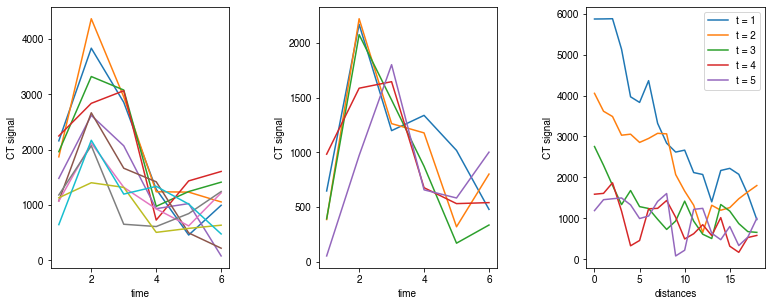

In [37]:
concentrations = signaldf
time = signaldf.time

fig, axes = plt.subplots(ncols=3, figsize=[12.8, 4.8])

ax = axes[0]
for i in range(6, 16):
    namestring = f'Label {i}'
    ax.plot(time, concentrations.loc[:, namestring], label=namestring)

ax.set_xlabel("time")
ax.set_ylabel("CT signal")
    
ax = axes[1]
for i in range(15, 20):
    namestring = f'Label {i}'
    ax.plot(time, concentrations.loc[:, namestring], label=namestring)

#ax.plot(time, concentrations.loc[:, "Label 7"], label="Label 7")
#ax.plot(time, concentrations.loc[:, "Label 10"], label="Label 10")
ax.set_xlabel("time")
ax.set_ylabel("CT signal")
#ax.legend()

ax = axes[2]
for timeindex in [1, 2, 3, 4, 5]:
    ax.plot(concentrations.iloc[timeindex, :20].values, label=f"t = {time[timeindex]}")

ax.set_xlabel("distances")
ax.set_ylabel("CT signal")
ax.legend()

plt.subplots_adjust(wspace=0.5)
plt.show()

In [104]:
imp.reload(prc)

<module 'parse_raw_ct' from '/Users/lgn148/Documents/GitHub/Collab-BrainEfflux/code/src/parse_raw_ct.py'>

In [113]:
microns_per_pixel = 20
ca1pixeldatadir = datadir + 'ca1pixel/'
ca1pixelparseddir = ca1pixeldatadir.replace("raw", "parsed")
locsfiles = [d for d in listdir(ca1pixeldatadir) if 'locations' in d]
signalfiles = [d for d in listdir(ca1pixeldatadir) if 'signal' in d]

In [114]:
for locsfile in locsfiles:
    prc.parseca1distances(ca1pixeldatadir, locsfile, ca1pixelparseddir, microns_per_pixel)

In [115]:
for signalfile in signalfiles:
    signaldf, voldict = prc.parse_csv(ca1pixeldatadir, filename=signalfile)
    signaldf.to_csv(ca1pixelparseddir + signalfile.replace("_signal_", "_").replace(".csv", "_parsed.csv"))

In [7]:
datadir = "../../data/parsed/CT/"
CT_conc_files = sorted([l for l in listdir(datadir) if "parsed" in l])
CT_distance_files = sorted([l for l in listdir(datadir) if "distan" in l])
ear_IDs = [fn.split("_parsed")[0] for fn in CT_conc_files]

CT_datafiles = pd.DataFrame({"ID": ear_IDs, "conc": CT_conc_files, "dist": CT_distance_files})
CT_datafiles

,ID,conc,dist
0,20210120_m1_l,20210120_m1_l_parsed.csv,20210120_m1_l_distances.csv
1,20210120_m1_r,20210120_m1_r_parsed.csv,20210120_m1_r_distances.csv
2,20210120_m2_l,20210120_m2_l_parsed.csv,20210120_m2_l_distances.csv
3,20210120_m2_r,20210120_m2_r_parsed.csv,20210120_m2_r_distances.csv
4,20210120_m3_l,20210120_m3_l_parsed.csv,20210120_m3_l_distances.csv
5,20210120_m3_r,20210120_m3_r_parsed.csv,20210120_m3_r_distances.csv
6,20210120_m4_l,20210120_m4_l_parsed.csv,20210120_m4_l_distances.csv
7,20210120_m4_r,20210120_m4_r_parsed.csv,20210120_m4_r_distances.csv
8,20210120_m6_l,20210120_m6_l_parsed.csv,20210120_m6_l_distances.csv
9,20210120_m6_r,20210120_m6_r_parsed.csv,20210120_m6_r_distances.csv


In [8]:
time, microndistances, concentrations = loadear_CA_ST(datadir, "20210120_m6_l")

In [9]:
for ID in CT_datafiles['ID']:
    combine_CA_ST(datadir, datadir + "combined_CA_ST/", ID)


We can plot the data for specific regions of interst (locations) over time, or plot all the regions over space.

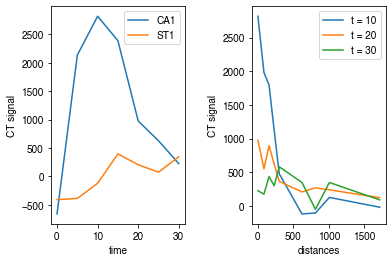

In [10]:
fig, axes = plt.subplots(ncols=2)

ax = axes[0]
ax.plot(time, concentrations.loc[:, "CA1"], label="CA1")
ax.plot(time, concentrations.loc[:, "ST1"], label="ST1")
ax.set_xlabel("time")
ax.set_ylabel("CT signal")
ax.legend()

ax = axes[1]
timeindex = 2
ax.plot(microndistances, concentrations.iloc[timeindex, :].values, label=f"t = {time[timeindex]}")
timeindex = 4
ax.plot(microndistances, concentrations.iloc[timeindex, :].values, label=f"t = {time[timeindex]}")
timeindex = 6
ax.plot(microndistances, concentrations.iloc[timeindex, :].values, label=f"t = {time[timeindex]}")
ax.set_xlabel("distances")
ax.set_ylabel("CT signal")
ax.legend()

plt.subplots_adjust(wspace=0.5)
plt.show()